# Multiple Linear Regression


## Import required packages

In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, liftChart, gainsChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### California Housing Price Data

Data dictionary<br>

1. longitude: A measure of how far west a house is; a higher value is farther west<br>

2. latitude: A measure of how far north a house is; a higher value is farther north<br>

3. housing median age: Median age of a house within a block; a lower number is a newer building<br>

4. total rooms: Total number of rooms within a block<br>

5. total bedrooms: Total number of bedrooms within a block<br>

6. population: Total number of people residing within a block<br>

7. households: Total number of households, a group of people residing within a home unit, for a block<br>

8. median Income: median income for households within a block of houses (measured in tens of thousands of US Dollars)<br>

9. median house value: Median house value for households within a block (measured in US Dollars)<br>

10. ocean proximity: Location of the house w.r.t ocean/sea<br>

In [2]:
ca_df = pd.read_csv('../resource/lib/public/CA_housing.csv')
ca_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [3]:
# Display the variable names, non-null counts, and datatypes

ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


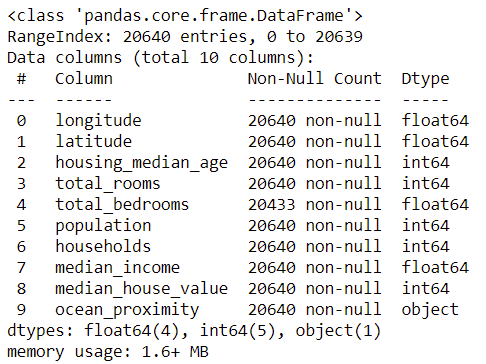

In [4]:
# Display the descriptive statistics for all variables, including missing value counts

pd.DataFrame({'mean': ca_df.mean(),
              'sd': ca_df.std(),
              'min': ca_df.min(),
              'max': ca_df.max(),
              'median': ca_df.median(),
              'length': len(ca_df),
              'miss.val': ca_df.isnull().sum(), #.isnull().sum()
             })

,mean,sd,min,max,median,length,miss.val
households,499.539680,382.329753,1,6082,409.0000,20640,0
housing_median_age,28.639486,12.585558,1,52,29.0000,20640,0
latitude,35.631861,2.135952,32.54,41.95,34.2600,20640,0
longitude,-119.569704,2.003532,-124.35,-114.31,-118.4900,20640,0
median_house_value,206855.816909,115395.615874,14999,500001,179700.0000,20640,0
median_income,3.870671,1.899822,0.4999,15.0001,3.5348,20640,0
ocean_proximity,NaN,NaN,<1H OCEAN,NEAR OCEAN,NaN,20640,0
population,1425.476744,1132.462122,3,35682,1166.0000,20640,0
total_bedrooms,537.870553,421.385070,1,6445,435.0000,20640,207
total_rooms,2635.763081,2181.615252,2,39320,2127.0000,20640,0


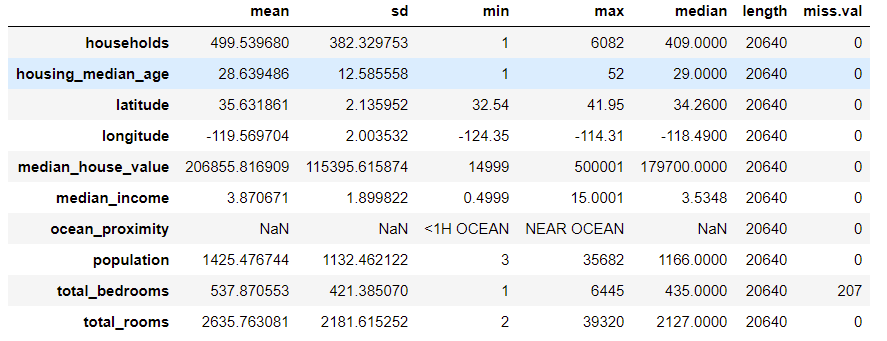

In [4]:
# Here's one option for dealing with missing values by removing every row with a missing value

ca_df = ca_df.dropna() #.dropna()

# Display the number of samples after removing missing values

ca_df.shape

(20433, 10)

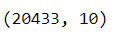

In [5]:
# Display the number of blocks in each type of ocean_proximity

ca_df.ocean_proximity.value_counts() #.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

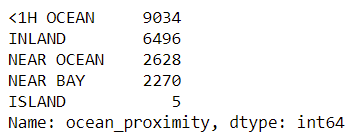

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (20433, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0

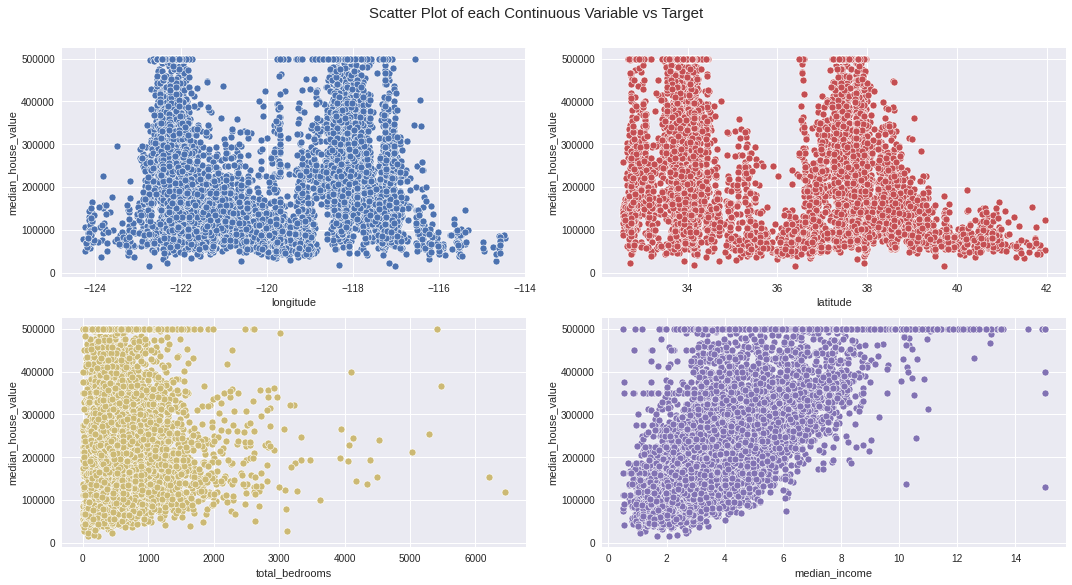

Number of All Scatter Plots = 10


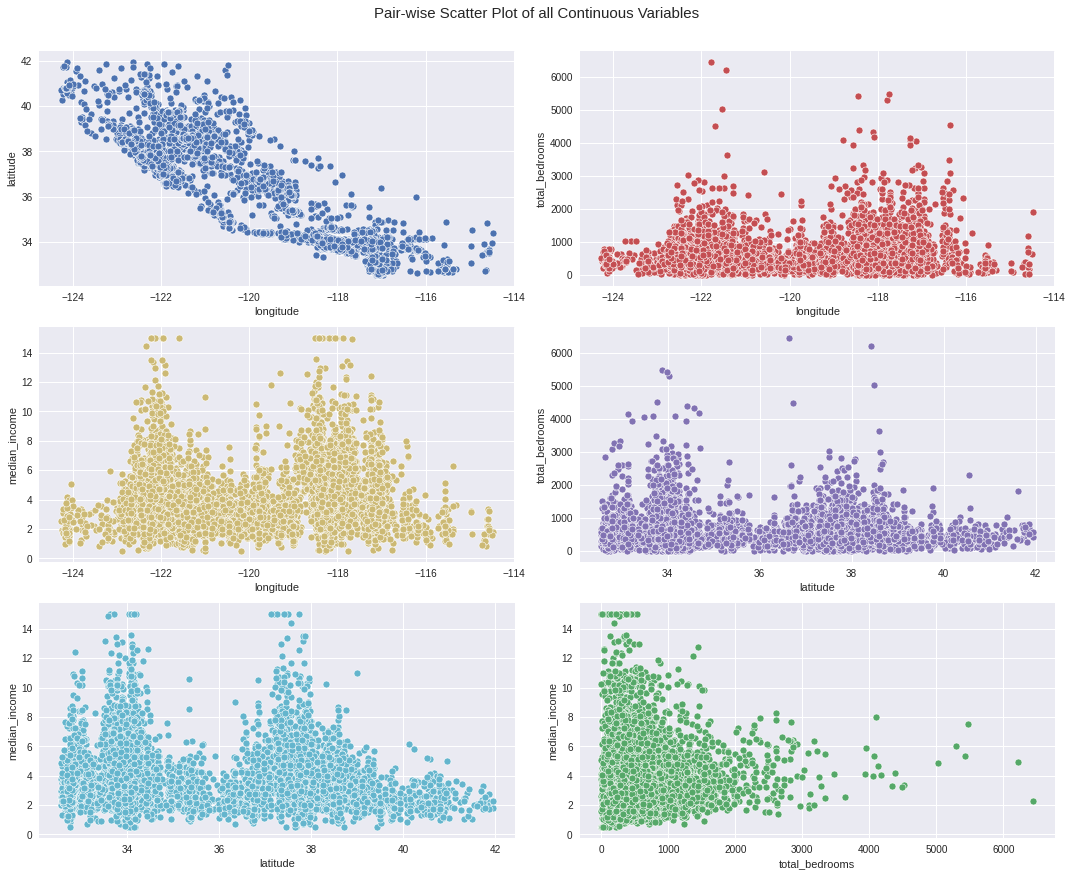

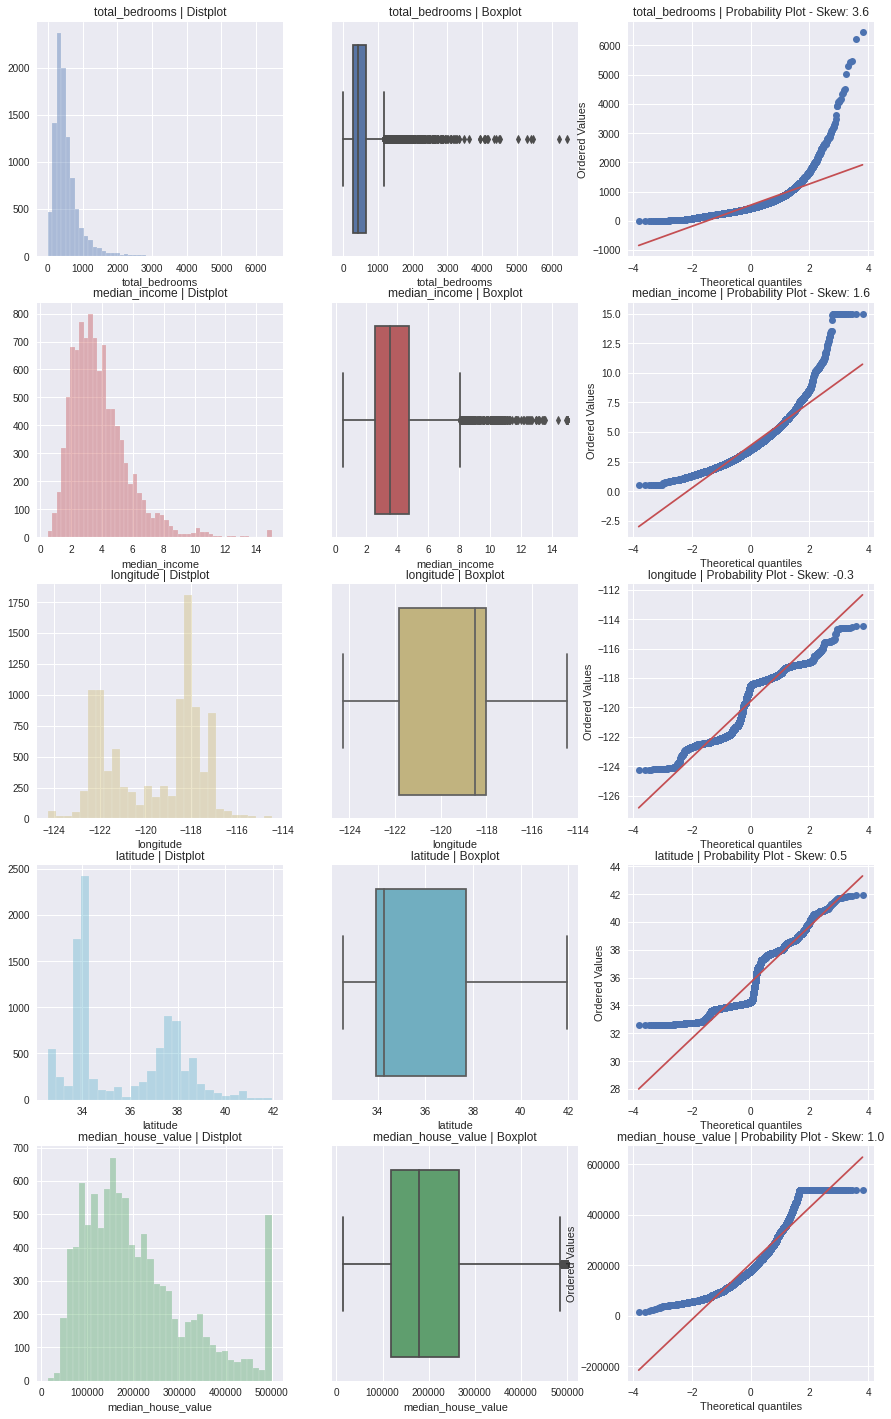

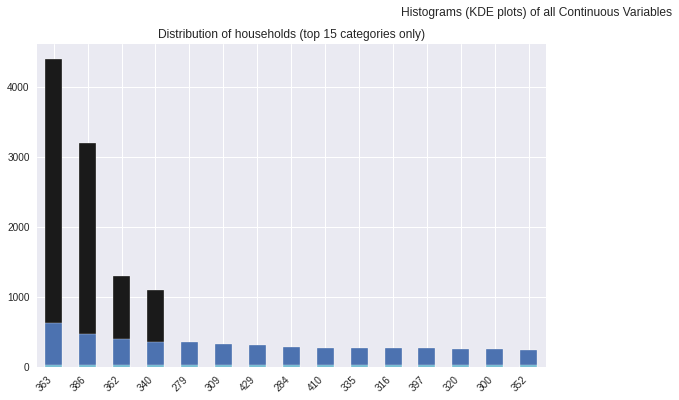

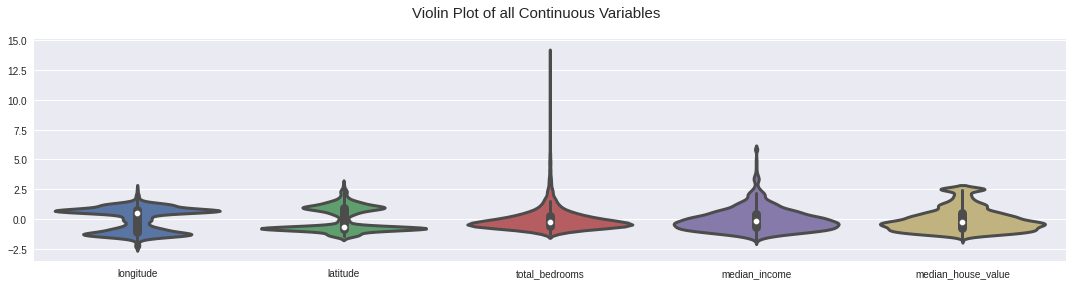

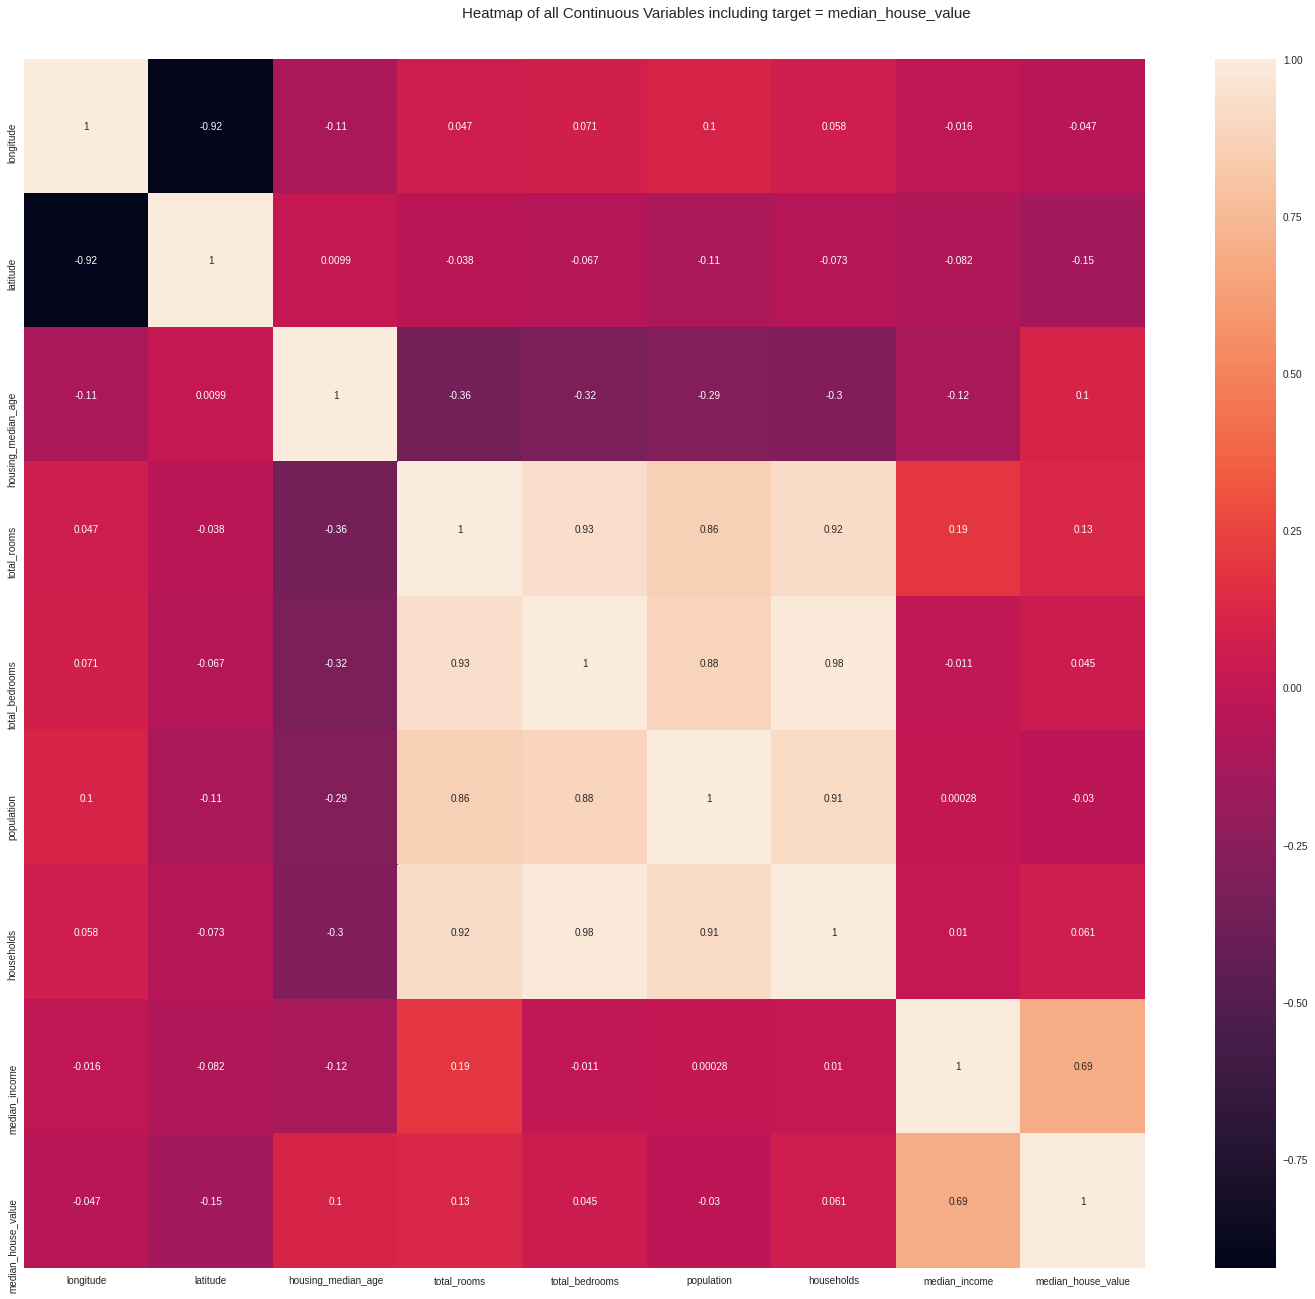

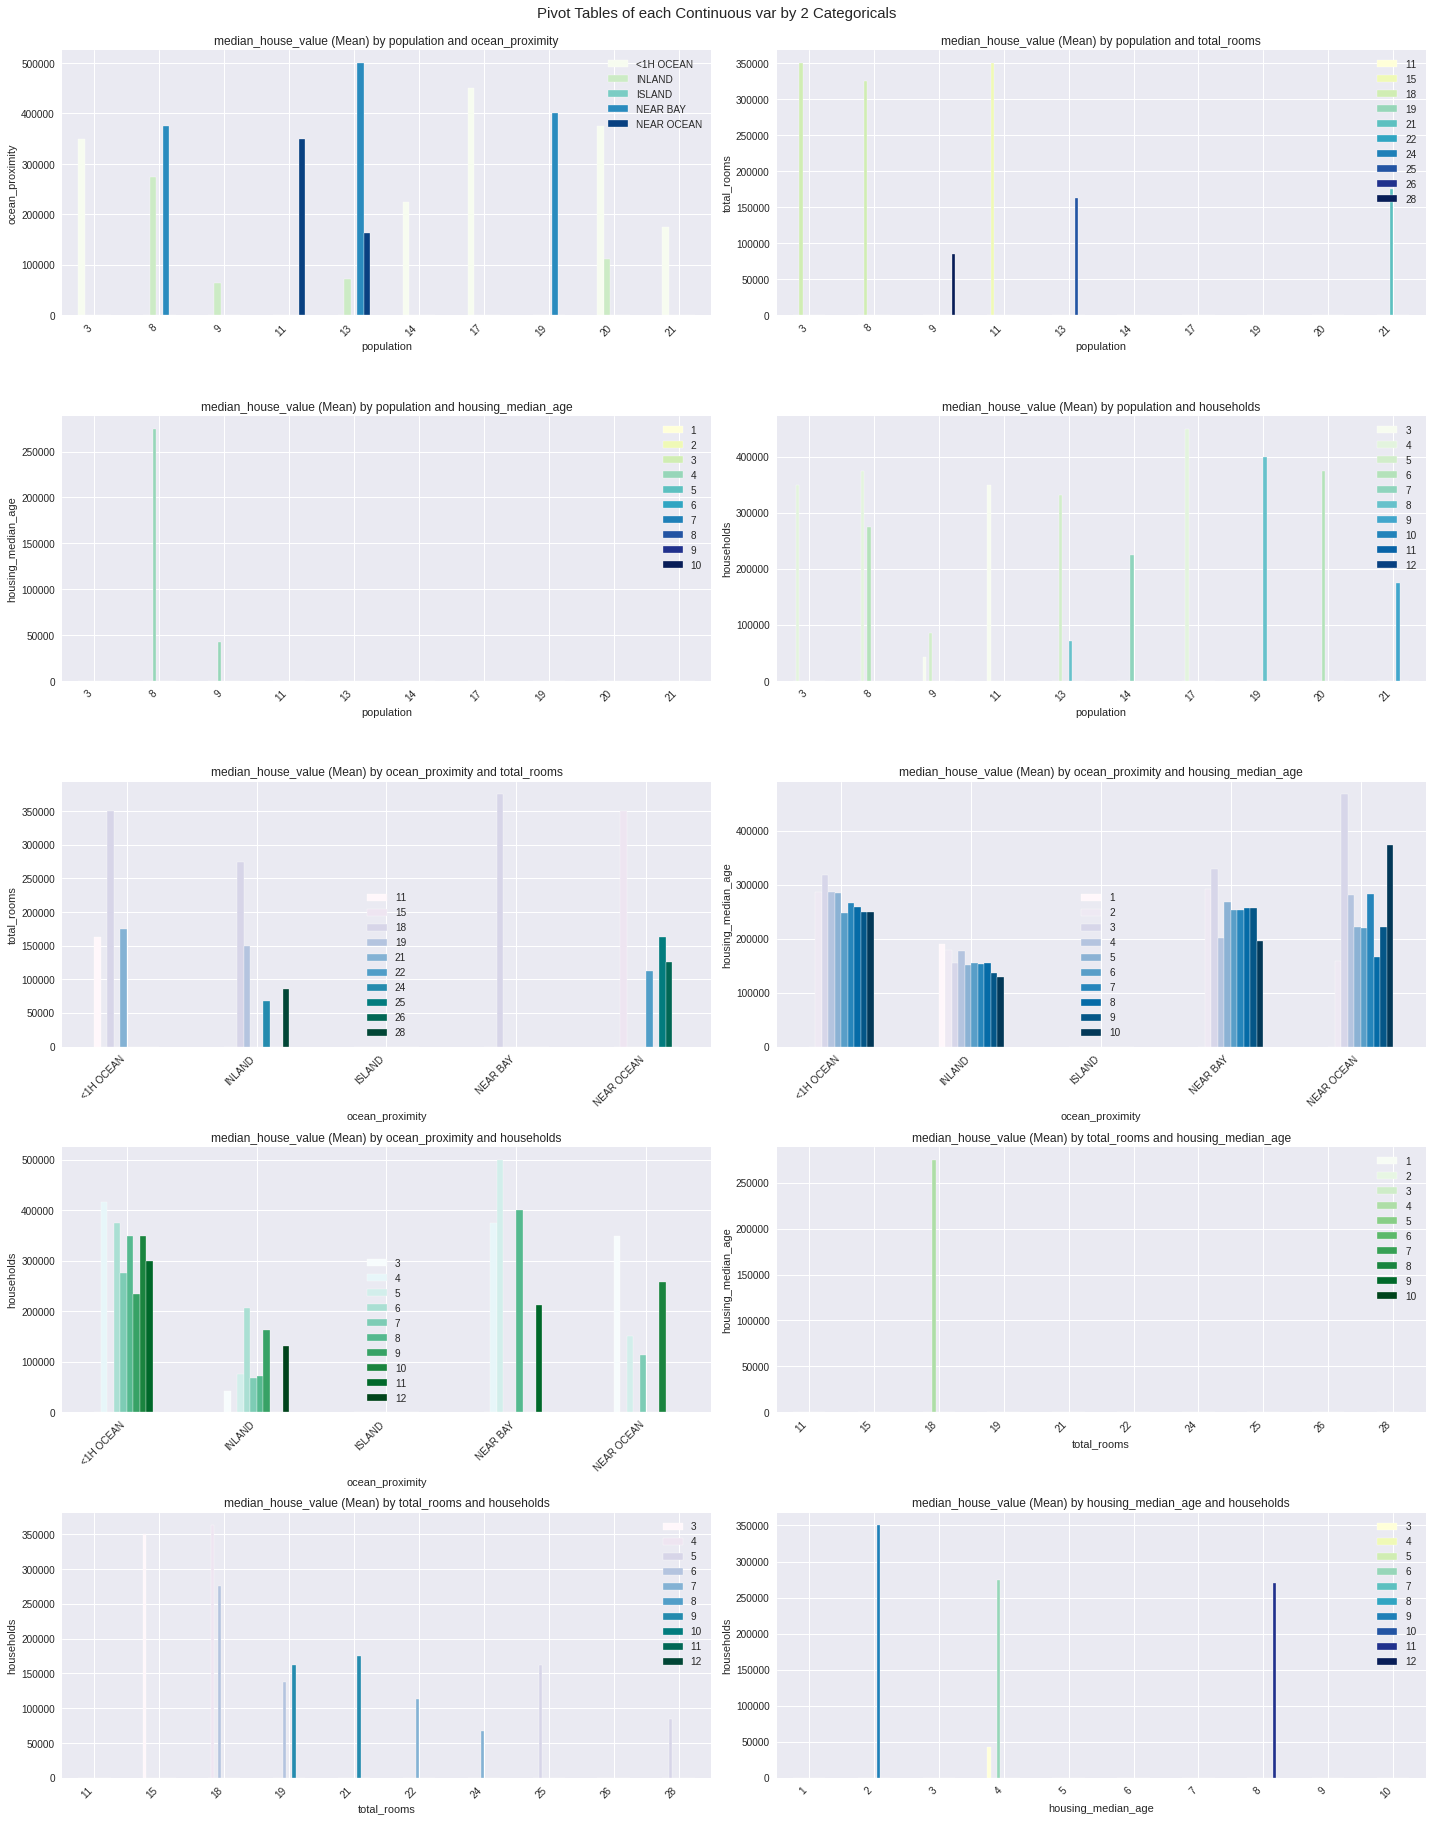

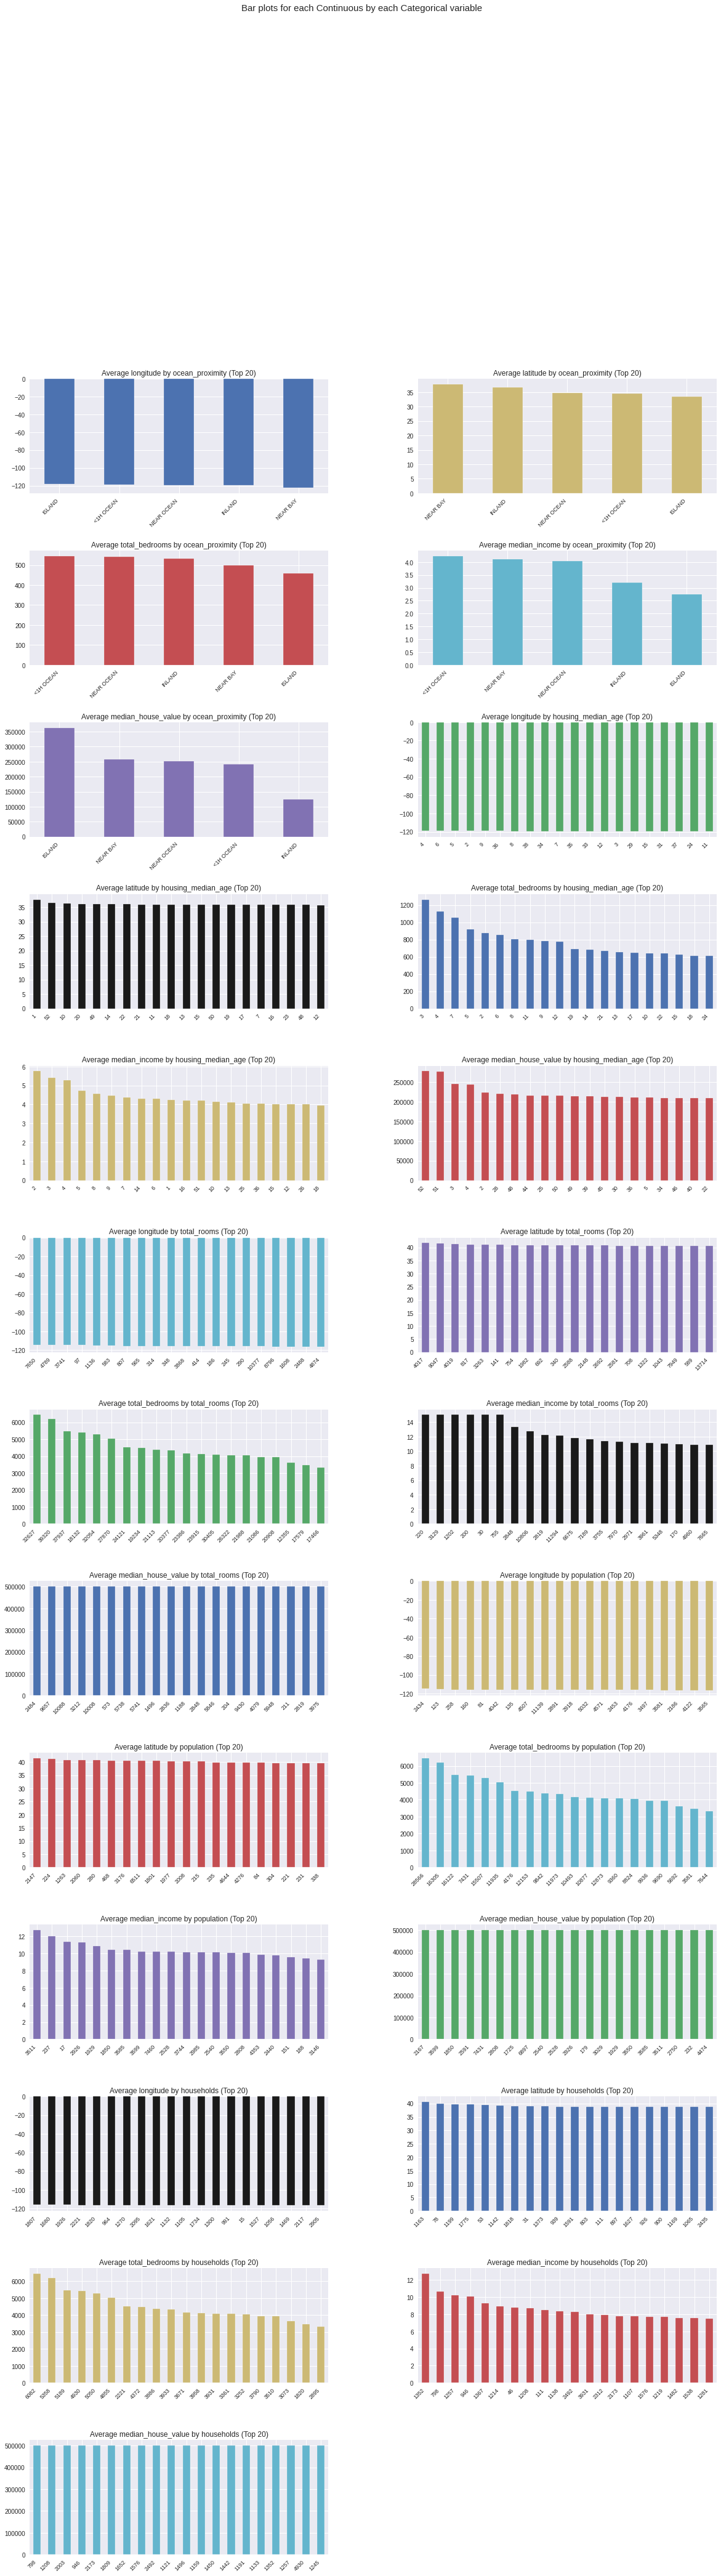

All Plots done
Time to run AutoViz (in seconds) = 17.317

 ###################### VISUALIZATION Completed ########################


In [7]:
# Generate a complete Exploratory Data Analysis

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ""
separator = ""

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar='median_house_value',
    dfte = ca_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=10000,
    max_cols_analyzed=30,
)

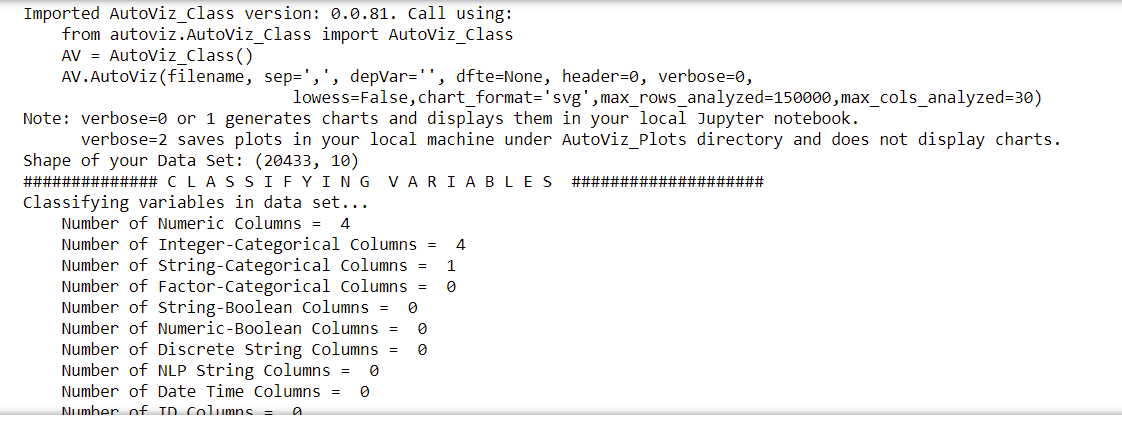

In [6]:
# isolate predictors separate from the response variable

X = ca_df.drop(columns=['median_house_value']) # .drop(columns=[])
y = ca_df['median_house_value']

In [7]:
# One-hot encode the categorical variables but don't alter the original X object

X_ohe = pd.get_dummies(X, prefix_sep="_", drop_first=True)

print(X_ohe.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


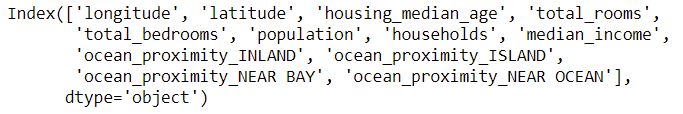

In [8]:
# Check the number of samples and predictors

X_ohe.shape

(20433, 12)

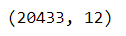

## EXPLANATORY MODEL HERE

In [9]:
# load the linear regression algorithm into an object called "data_lm"
data_lm = LinearRegression()

# fit the linear regression algorithm object to the entire dataset, thus creating an explanatory model
explanatory_model = data_lm.fit(X_ohe, y)

In [10]:
# print coefficients from the explanatory model
print('intercept ', explanatory_model.intercept_)

print(pd.DataFrame({'Predictor': X_ohe.columns, 'coefficient': explanatory_model.coef_}))

intercept  -2269954.1161332238
                     Predictor    coefficient
0                    longitude  -26812.989282
1                     latitude  -25482.184831
2           housing_median_age    1072.520042
3                  total_rooms      -6.193264
4               total_bedrooms     100.556290
5                   population     -37.969083
6                   households      49.617326
7                median_income   39259.572876
8       ocean_proximity_INLAND  -39284.300195
9       ocean_proximity_ISLAND  152901.941119
10    ocean_proximity_NEAR BAY   -3954.051625
11  ocean_proximity_NEAR OCEAN    4278.134324


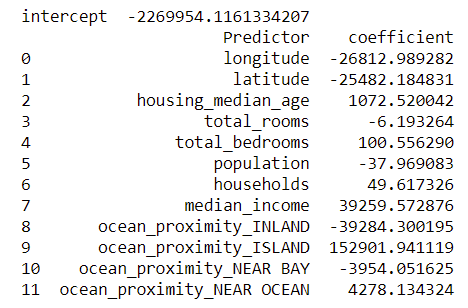

In [11]:
# Print out the measures of model fit

pred_y = explanatory_model.predict(X_ohe)

print('adjusted r2 : ', adjusted_r2_score(y, pred_y, explanatory_model))
print('AIC : ', AIC_score(y, pred_y, explanatory_model))
print('BIC : ', BIC_score(y, pred_y, explanatory_model))


adjusted r2 :  0.6462560732632219
AIC :  513120.9804038032
BIC :  513231.9290950819


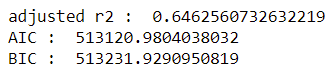

## PREDICTIVE MODEL HERE

In [3]:
# Reload the data to return to the original dataset with missing values

ca_df = pd.read_csv('../resource/lib/public/CA_housing.csv')

In [4]:
# isolate predictors separate from the response variable

X = ca_df.drop(columns=['median_house_value'])
y = ca_df['median_house_value']

In [5]:
# partition the data into training and test sets with 50% of the data in each

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=1)

In [6]:
# this algorithm encodes categorical variables as if all of them are ordinal

import category_encoders as ce

encoder = ce.CatBoostEncoder()

train_X = encoder.fit_transform(train_X, train_y)

test_X = encoder.transform(test_X, test_y)

In [7]:
# ?Here's a method we can use with predictive models after the train/test split

from sklearn.impute import KNNImputer

imputer = KNNImputer()

train_X = imputer.fit_transform(train_X)

test_X = imputer.transform(test_X)

In [8]:
# Check the training samples and predictors after ordinal encoding and missing value imputation

train_X.shape

(10320, 9)

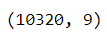

In [9]:
# load the linear regression algorithm into an object called "data_lm"
data_lm = LinearRegression()

# fit the linear regression algorithm object to the training data, thus creating a model
model = data_lm.fit(train_X, train_y)

In [10]:
# print performance measures of the training data

regressionSummary(train_y, model.predict(train_X))
print()
regressionSummary(test_y, model.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 68525.7769
            Mean Absolute Error (MAE) : 49845.2694
          Mean Percentage Error (MPE) : -10.0978
Mean Absolute Percentage Error (MAPE) : 28.6789


Regression statistics

                      Mean Error (ME) : 249.8051
       Root Mean Squared Error (RMSE) : 69093.5964
            Mean Absolute Error (MAE) : 49785.8743
          Mean Percentage Error (MPE) : -10.1935
Mean Absolute Percentage Error (MAPE) : 28.7662


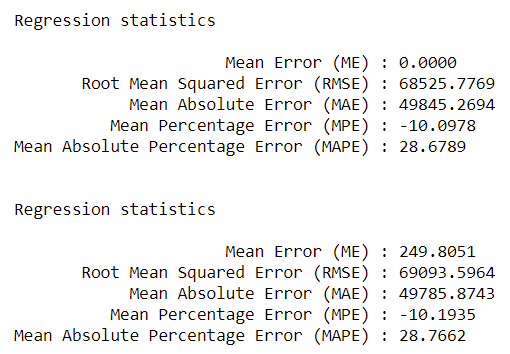

In [ ]:
# Display a histogram of the residuals to determine whether to use RMSE or MAE

%matplotlib inline

data_lm_pred = model.???(test_X)
all_residuals = test_y - ???

# Determine the percentage of datapoints with a residual in [-200000, 200000] = approx. 75\%
print(len(all_residuals[(all_residuals > -200000) & (all_residuals < 200000)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=50)

plt.tight_layout()
plt.show()

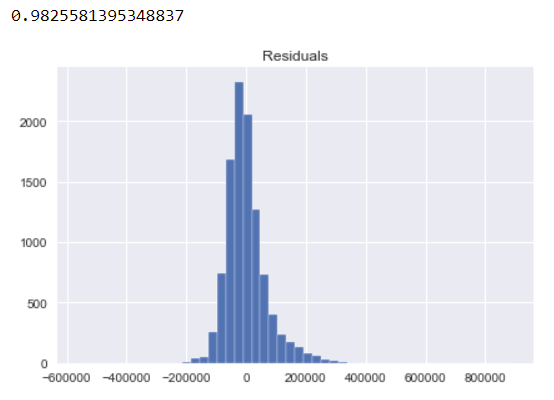

In [ ]:
# Display the descriptive statistics for the residuals

???

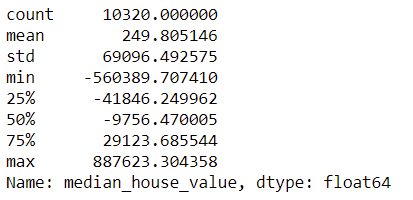

In [ ]:
# Checking residuals by sample in the test data

model_pred = model.predict(???)

result = pd.DataFrame({'Predicted': model_pred, 'Actual': test_y,
                       'Residual': ??? - model_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(test_y, model_pred)

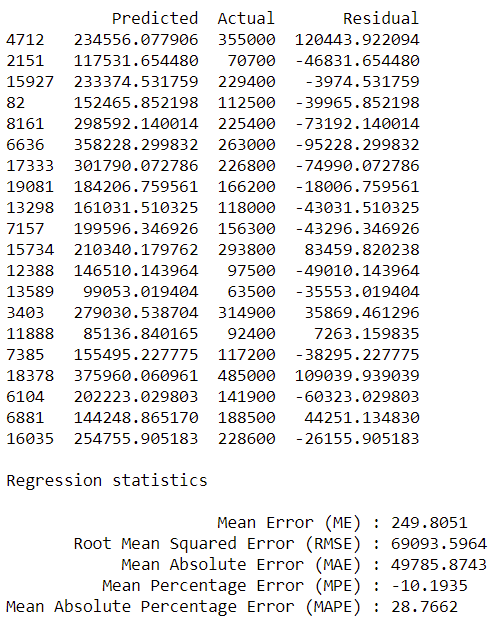

In [ ]:
# Gain and lift charts for inspecting model goodness of fit

pred_v = pd.Series(model.predict(???))

pred_v = pred_v.sort_values(ascending=False)

fig,axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Gains')
ax.set_title("Cumulative Gains Chart")

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel("Lift")

plt.tight_layout()
plt.show()

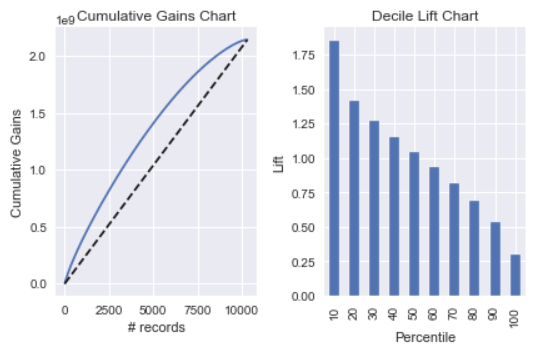